<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#项目介绍" data-toc-modified-id="项目介绍-1">项目介绍</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#数据维度概况" data-toc-modified-id="数据维度概况-1.0.1">数据维度概况</a></span></li><li><span><a href="#数据13个维度介绍" data-toc-modified-id="数据13个维度介绍-1.0.2">数据13个维度介绍</a></span></li></ul></li></ul></li><li><span><a href="#导入库，加载数据" data-toc-modified-id="导入库，加载数据-2">导入库，加载数据</a></span><ul class="toc-item"><li><span><a href="#数据审查" data-toc-modified-id="数据审查-2.1">数据审查</a></span></li></ul></li><li><span><a href="#数据处理" data-toc-modified-id="数据处理-3">数据处理</a></span></li><li><span><a href="#建立模型" data-toc-modified-id="建立模型-4">建立模型</a></span></li><li><span><a href="#聚类结果特征分析与展示" data-toc-modified-id="聚类结果特征分析与展示-5">聚类结果特征分析与展示</a></span></li><li><span><a href="#数据结论" data-toc-modified-id="数据结论-6">数据结论</a></span></li></ul></div>

## 项目介绍

假如公司投放广告的渠道很多，每个渠道的客户性质也可能不同，比如在优酷视频投广告和今日头条投放广告，效果可能会有差异。现在需要对广告效果分析实现有针对性的广告效果测量和优化工作。

本案例，通过各类广告渠道90天内额日均UV，平均注册率、平均搜索率、访问深度、平均停留时长、订单转化率、投放时间、素材类型、广告类型、合作方式、广告尺寸和广告卖点等特征，将渠道分类，找出每类渠道的重点特征，为加下来的业务讨论和数据分析提供支持。

####  数据维度概况

除了渠道唯一标识，共12个维度，889行，有缺失值，有异常值。

#### 数据13个维度介绍

1、渠道代号：渠道唯一标识  
2、日均UV：每天的独立访问量  
3、平均注册率=日均注册用户数/平均每日访问量  
4、平均搜索量：每个访问的搜索量  
5、访问深度：总页面浏览量/平均每天的访问量  
6、平均停留时长=总停留时长/平均每天的访问量  
7、订单转化率=总订单数量/平均每天的访客量  
8、投放时间：每个广告在外投放的天数  
9、素材类型：'jpg' 'swf' 'gif' 'sp'  
10、广告类型：banner、tips、不确定、横幅、暂停  
11、合作方式：'roi' 'cpc' 'cpm' 'cpd'  
12、广告尺寸：'140*40' '308*388' '450*300' '600*90' '480*360' '960*126' '900*120'
'390*270'  
13、广告卖点：打折、满减、满赠、秒杀、直降、满返  

## 导入库，加载数据

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder 
from sklearn.metrics import silhouette_score # 导入轮廓系数指标
from sklearn.cluster import KMeans # KMeans模块
%matplotlib inline
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

c:\ProgramData\Anaconda3\envs\python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


以上是加载库的国际惯例，OneHotEncoder是独热编码，如果一个类别特征有n个类别，将该变量按照类别分裂成N维新变量，包含则标记为1，否则为0，用N维特征表示原来的特征。

In [2]:
raw_data = pd.read_csv(r'./ad_performance.csv')
raw_data.head()

渠道代号    日均UV   平均注册率   平均搜索量    访问深度  平均停留时间   订单转化率  投放总时间 素材类型    广告类型  \
0  A203    3.69  0.0071  0.0214  2.3071  419.77  0.0258     20  jpg  banner   
1  A387  178.70  0.0040  0.0324  2.0489  157.94  0.0030     19  jpg  banner   
2  A388   91.77  0.0022  0.0530  1.8771  357.93  0.0026      4  jpg  banner   
3  A389    1.09  0.0074  0.3382  4.2426  364.07  0.0153     10  jpg  banner   
4  A390    3.37  0.0028  0.1740  2.1934  313.34  0.0007     30  jpg  banner   

  合作方式    广告尺寸 广告卖点  
0  roi  140*40   打折  
1  cpc  140*40   满减  
2  cpc  140*40   满减  
3  cpc  140*40   满减  
4  cpc  140*40   满减

渠道代号是唯一标识，日均UV到投放总时间是数值型（float和int）变量，后面是字符型变量。

### 数据审查

In [3]:
# 查看基本状态
raw_data.head(2)  # 打印输出前2条数据

渠道代号    日均UV   平均注册率   平均搜索量    访问深度  平均停留时间   订单转化率  投放总时间 素材类型    广告类型  \
0  A203    3.69  0.0071  0.0214  2.3071  419.77  0.0258     20  jpg  banner   
1  A387  178.70  0.0040  0.0324  2.0489  157.94  0.0030     19  jpg  banner   

  合作方式    广告尺寸 广告卖点  
0  roi  140*40   打折  
1  cpc  140*40   满减

In [4]:
raw_data.info()# 打印数据类型分布

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   渠道代号    889 non-null    object 
 1   日均UV    889 non-null    float64
 2   平均注册率   889 non-null    float64
 3   平均搜索量   889 non-null    float64
 4   访问深度    889 non-null    float64
 5   平均停留时间  887 non-null    float64
 6   订单转化率   889 non-null    float64
 7   投放总时间   889 non-null    int64  
 8   素材类型    889 non-null    object 
 9   广告类型    889 non-null    object 
 10  合作方式    889 non-null    object 
 11  广告尺寸    889 non-null    object 
 12  广告卖点    889 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 90.4+ KB


In [14]:
raw_data.describe().round(2).T # 打印原始数据基本描述性信息

count    mean      std   min     25%     50%     75%       max
日均UV    889.0  540.85  1634.41  0.06    6.18  114.18  466.87  25294.77
平均注册率   889.0    0.00     0.00  0.00    0.00    0.00    0.00      0.04
平均搜索量   889.0    0.03     0.11  0.00    0.00    0.00    0.01      1.04
访问深度    889.0    2.17     3.80  1.00    1.39    1.79    2.22     98.98
平均停留时间  887.0  262.67   224.36  1.64  126.02  236.55  357.98   4450.83
订单转化率   889.0    0.00     0.01  0.00    0.00    0.00    0.00      0.22
投放总时间   889.0   16.05     8.51  1.00    9.00   16.00   24.00     30.00

上面代码，分别展示前两条数据、所有特征的数据类型、以及数值型特征的五值分布

查看缺失值情况：

In [5]:
# 缺失值审查
na_cols = raw_data.isnull().any(axis=0)  # 查看每一列是否具有缺失值
na_cols

渠道代号      False
日均UV      False
平均注册率     False
平均搜索量     False
访问深度      False
平均停留时间     True
订单转化率     False
投放总时间     False
素材类型      False
广告类型      False
合作方式      False
广告尺寸      False
广告卖点      False
dtype: bool

In [6]:
raw_data.isnull().sum().sort_values(ascending=False)# 查看具有缺失值的行总记录数

平均停留时间    2
渠道代号      0
日均UV      0
平均注册率     0
平均搜索量     0
访问深度      0
订单转化率     0
投放总时间     0
素材类型      0
广告类型      0
合作方式      0
广告尺寸      0
广告卖点      0
dtype: int64

变量之间的相关性分析：

In [7]:
# 相关性分析
raw_data.corr(numeric_only=True).round(2).T # 打印原始数据相关性信息

TypeError: DataFrame.corr() got an unexpected keyword argument 'numeric_only'

<Axes: >

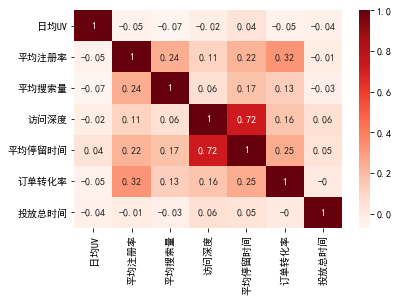

In [8]:
# 相关性可视化展示
import seaborn as sns 
corr = raw_data.corr().round(2)
sns.heatmap(corr,cmap='Reds',annot = True)

可以看到，“访问深度”和“平均停留时间”相关性比较高，相关性高说明两个变量在建立模型的时候，作用是一样或者效果是一样的，可以考虑组合或者删除其一。

## 数据处理

数据了解的差不多了，我们开始时处理数据，把常规数据通过清洗、转换、规约、聚合、抽样等方式变成机器学习可以识别或者提升准确度的数据。

In [9]:
# 1 删除平均平均停留时间列
raw_data2 = raw_data.drop(['平均停留时间'],axis=1)

类别变量的独热编码：

In [10]:
# 类别变量取值
cols=["素材类型","广告类型","合作方式","广告尺寸","广告卖点"]
for x in cols:
    data=raw_data2[x].unique()
    print("变量【{0}】的取值有：\n{1}".format(x,data))
    print("-·"*20)

变量【素材类型】的取值有：
['jpg' 'swf' 'gif' 'sp']
-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·
变量【广告类型】的取值有：
['banner' 'tips' '不确定' '横幅' '暂停']
-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·
变量【合作方式】的取值有：
['roi' 'cpc' 'cpm' 'cpd']
-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·
变量【广告尺寸】的取值有：
['140*40' '308*388' '450*300' '600*90' '480*360' '960*126' '900*120'
 '390*270']
-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·
变量【广告卖点】的取值有：
['打折' '满减' '满赠' '秒杀' '直降' '满返']
-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·-·


In [11]:
# 字符串分类独热编码处理
cols = ['素材类型','广告类型','合作方式','广告尺寸','广告卖点'] 
model_ohe = OneHotEncoder(sparse=False)  # 建立OneHotEncode对象
ohe_matrix = model_ohe.fit_transform(raw_data2[cols])  # 直接转换
print(ohe_matrix[:2])

[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0.]]


In [22]:
# 用pandas的方法
ohe_matrix1=pd.get_dummies(raw_data2[cols])
ohe_matrix1.head(5)

素材类型_gif  素材类型_jpg  素材类型_sp  素材类型_swf  广告类型_banner  广告类型_tips  广告类型_不确定  \
0         0         1        0         0            1          0         0   
1         0         1        0         0            1          0         0   
2         0         1        0         0            1          0         0   
3         0         1        0         0            1          0         0   
4         0         1        0         0            1          0         0   

   广告类型_暂停  广告类型_横幅  合作方式_cpc  ...  广告尺寸_480*360  广告尺寸_600*90  广告尺寸_900*120  \
0        0        0         0  ...             0            0             0   
1        0        0         1  ...             0            0             0   
2        0        0         1  ...             0            0             0   
3        0        0         1  ...             0            0             0   
4        0        0         1  ...             0            0             0   

   广告尺寸_960*126  广告卖点_打折  广告卖点_满减  广告卖点_满赠  广告卖点_满返  广告卖点_直降  广告卖点_秒杀  
0             0        1        0        0        0        0        0  
1             0        0        1        0        0        0        0  
2             0        0        1        0        0        0        0  
3             0        0        1        0        0        0        0  
4             0        0        1        0        0        0        0  

[5 rows x 27 columns]

数据标准化：

In [12]:
# 数据标准化
sacle_matrix = raw_data2.iloc[:, 1:7]  # 获得要转换的矩阵
model_scaler = MinMaxScaler()  # 建立MinMaxScaler模型对象
data_scaled = model_scaler.fit_transform(sacle_matrix)  # MinMaxScaler标准化处理
print(data_scaled.round(2))

[[0.   0.18 0.02 0.01 0.12 0.66]
 [0.01 0.1  0.03 0.01 0.01 0.62]
 [0.   0.06 0.05 0.01 0.01 0.1 ]
 ...
 [0.01 0.01 0.   0.   0.   0.72]
 [0.05 0.   0.   0.   0.   0.31]
 [0.   0.   0.   0.53 0.   0.62]]


数据处理完，我们将独热编码的数据和标准化转化后的数据合并：

In [13]:
# # 合并所有维度
X = np.hstack((data_scaled, ohe_matrix))

数据处理完，就可以带入模型进行训练了。

## 建立模型


In [14]:
# 通过平均轮廓系数检验得到最佳KMeans聚类模型
score_list = list()  # 用来存储每个K下模型的平局轮廓系数
silhouette_int = -1  # 初始化的平均轮廓系数阀值
for n_clusters in range(2, 8):  # 遍历从2到5几个有限组
    model_kmeans = KMeans(n_clusters=n_clusters)  # 建立聚类模型对象
    labels_tmp = model_kmeans.fit_predict(X)  # 训练聚类模型
    silhouette_tmp = silhouette_score(X, labels_tmp)  # 得到每个K下的平均轮廓系数
    if silhouette_tmp > silhouette_int:  # 如果平均轮廓系数更高
        best_k = n_clusters  # 保存K将最好的K存储下来
        silhouette_int = silhouette_tmp  # 保存平均轮廓得分
        best_kmeans = model_kmeans  # 保存模型实例对象
        cluster_labels_k = labels_tmp  # 保存聚类标签
    score_list.append([n_clusters, silhouette_tmp])  # 将每次K及其得分追加到列表
print('{:*^60}'.format('K值对应的轮廓系数:'))
print(np.array(score_list))  # 打印输出所有K下的详细得分
print('最优的K值是:{0} \n对应的轮廓系数是:{1}'.format(best_k, silhouette_int))

*************************K值对应的轮廓系数:*************************
[[2.         0.38655493]
 [3.         0.45864451]
 [4.         0.50209812]
 [5.         0.4800359 ]
 [6.         0.47761127]
 [7.         0.50016363]]
最优的K值是:4 
对应的轮廓系数是:0.5020981194788053


总体思想（评价指标）还是怎么聚才能使得簇内距离足够小，簇与簇之间平均距离足够大来评判。

## 聚类结果特征分析与展示

通过上面模型，我们其实给每个观测（样本）打了个标签clusters，即他属于4类中的哪一类：

In [15]:
# 将原始数据与聚类标签整合
cluster_labels = pd.DataFrame(cluster_labels_k, columns=['clusters'])  # 获得训练集下的标签信息
merge_data = pd.concat((raw_data2, cluster_labels), axis=1)  # 将原始处理过的数据跟聚类标签整合
merge_data.head()

渠道代号    日均UV   平均注册率   平均搜索量    访问深度   订单转化率  投放总时间 素材类型    广告类型 合作方式  \
0  A203    3.69  0.0071  0.0214  2.3071  0.0258     20  jpg  banner  roi   
1  A387  178.70  0.0040  0.0324  2.0489  0.0030     19  jpg  banner  cpc   
2  A388   91.77  0.0022  0.0530  1.8771  0.0026      4  jpg  banner  cpc   
3  A389    1.09  0.0074  0.3382  4.2426  0.0153     10  jpg  banner  cpc   
4  A390    3.37  0.0028  0.1740  2.1934  0.0007     30  jpg  banner  cpc   

     广告尺寸 广告卖点  clusters  
0  140*40   打折         1  
1  140*40   满减         1  
2  140*40   满减         1  
3  140*40   满减         1  
4  140*40   满减         1

然后看看，每个类别下的样本数量和占比情况：

In [16]:
# 计算每个聚类类别下的样本量和样本占比
clustering_count = pd.DataFrame(merge_data['渠道代号'].groupby(merge_data['clusters']).count()).T.rename({'渠道代号': 'counts'})  # 计算每个聚类类别的样本量
clustering_ratio = (clustering_count / len(merge_data)).round(2).rename({'counts': 'percentage'})  # 计算每个聚类类别的样本量占比
print(clustering_count)
print("#"*30)
print(clustering_ratio)

clusters    0    1    2   3
counts    349  154  313  73
##############################
clusters       0     1     2     3
percentage  0.39  0.17  0.35  0.08


每个类别内部最显著的特征：

In [17]:
# 计算各个聚类类别内部最显著特征值
cluster_features = []  # 空列表，用于存储最终合并后的所有特征信息
for line in range(best_k):  # 读取每个类索引
    label_data = merge_data[merge_data['clusters'] == line]  # 获得特定类的数据

    part1_data = label_data.iloc[:, 1:7]  # 获得数值型数据特征
    part1_desc = part1_data.describe().round(3)  # 得到数值型特征的描述性统计信息
    merge_data1 = part1_desc.iloc[2, :]  # 得到数值型特征的均值

    part2_data = label_data.iloc[:, 7:-1]  # 获得字符串型数据特征
    part2_desc = part2_data.describe(include='all')  # 获得字符串型数据特征的描述性统计信息
    merge_data2 = part2_desc.iloc[2, :]  # 获得字符串型数据特征的最频繁值

    merge_line = pd.concat((merge_data1, merge_data2), axis=0)  # 将数值型和字符串型典型特征沿行合并
    cluster_features.append(merge_line)  # 将每个类别下的数据特征追加到列表

#  输出完整的类别特征信息
cluster_pd = pd.DataFrame(cluster_features).T  # 将列表转化为矩阵
print('{:*^60}'.format('每个类别主要的特征:'))
all_cluster_set = pd.concat((clustering_count, clustering_ratio, cluster_pd),axis=0)  # 将每个聚类类别的所有信息合并
all_cluster_set

*************************每个类别主要的特征:*************************


0         1         2         3
counts          349       154       313        73
percentage     0.39      0.17      0.35      0.08
日均UV        933.015  2717.419  1390.013  1904.371
平均注册率         0.003     0.005     0.003     0.003
平均搜索量         0.064     0.051     0.152     0.106
访问深度          5.916     0.947     1.168     0.943
订单转化率         0.006     0.007     0.017     0.009
投放总时间          8.77     8.529     8.199     8.217
素材类型            jpg       jpg       swf       swf
广告类型             横幅    banner       不确定      tips
合作方式            cpc       cpc       roi       cpm
广告尺寸         600*90   308*388    600*90   450*300
广告卖点             直降        满减        打折        打折

图形化输出：

In [18]:
#各类别数据预处理
num_sets = cluster_pd.iloc[:6, :].T.astype(np.float64)  # 获取要展示的数据
num_sets_max_min = model_scaler.fit_transform(num_sets)  # 获得标准化后的数据
print(num_sets)
print('-'*20)
print(num_sets_max_min)

       日均UV  平均注册率  平均搜索量   访问深度  订单转化率  投放总时间
0   933.015  0.003  0.064  5.916  0.006  8.770
1  2717.419  0.005  0.051  0.947  0.007  8.529
2  1390.013  0.003  0.152  1.168  0.017  8.199
3  1904.371  0.003  0.106  0.943  0.009  8.217
--------------------
[[0.00000000e+00 0.00000000e+00 1.28712871e-01 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 8.04343455e-04
  9.09090909e-02 5.77933450e-01]
 [2.56106801e-01 0.00000000e+00 1.00000000e+00 4.52443193e-02
  1.00000000e+00 0.00000000e+00]
 [5.44358789e-01 0.00000000e+00 5.44554455e-01 0.00000000e+00
  2.72727273e-01 3.15236427e-02]]


[0.         1.04719755 2.0943951  3.14159265 4.1887902  5.23598776
 0.        ]
['日均UV' '平均注册率' '平均搜索量' '访问深度' '订单转化率' '投放总时间']


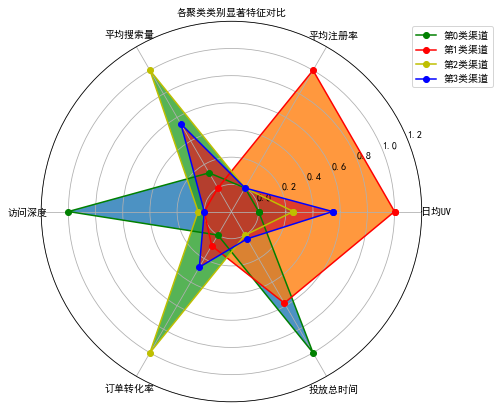

In [19]:
# 画图
fig = plt.figure(figsize=(7,7))  # 建立画布
ax = fig.add_subplot(111, polar=True)  # 增加子网格，注意polar参数
labels = np.array(merge_data1.index)  # 设置要展示的数据标签
cor_list = ['g', 'r', 'y', 'b']  # 定义不同类别的颜色
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)  # 计算各个区间的角度
angles = np.concatenate((angles, [angles[0]]))  # 建立相同首尾字段以便于闭合
# 画雷达图
for i in range(len(num_sets)):  # 循环每个类别
    data_tmp = num_sets_max_min[i, :]  # 获得对应类数据
    data = np.concatenate((data_tmp, [data_tmp[0]]))  # 建立相同首尾字段以便于闭合
    ax.plot(angles, data, 'o-', c=cor_list[i], label="第%d类渠道"%(i))  # 画线
    ax.fill(angles, data,alpha=0.8)
    
# 设置图像显示格式
print(angles)
print(labels)

ax.set_thetagrids(angles[0:-1] * 180 / np.pi, labels, fontproperties="SimHei")  # 设置极坐标轴
ax.set_title("各聚类类别显著特征对比", fontproperties="SimHei")  # 设置标题放置
ax.set_rlim(-0.2, 1.2)  # 设置坐标轴尺度范围
plt.legend(loc="upper right" ,bbox_to_anchor=(1.2,1.0))  # 设置图例位置

## 数据结论


从案例结果来看，所有的渠道被分为4各类别，每个类别的样本量分别为：154、313、349 、73，对应占比分别为：17%、35%、39%、8%。

通过雷达图可以清楚的知道：

类别1（索引为2类的渠道）
这类广告媒体除了访问深度和投放时间较高，其他属性较低，因此这类广告媒体效果质量较差，并且占到39%，因此这类是主题渠道之一。
业务部门要考虑他的实际投放价值。



类别2（索引为1类的渠道）
这类广告媒体除了访问深度略差，在平均搜索量、日均UV、订单转化率等广告效果指标上表现良好，是一类综合效果较好的渠道。
但是日均UV是短板，较低。无法给企业带来大量的流量以及新用户，这类广告的特质适合用户转化，尤其是有关订单的转化提升。



类别3（索引为0类的渠道）
这类广告媒体的显著特征是日均UV和注册率较高，其“引流”和“拉新”效果好，可以在广告媒体中定位为引流角色。
符合“广而告之”的诉求，适合“拉新”使用。



类别4（索引为3类的渠道）
这类渠道各方面特征都不明显，各个流量质量和流量数量的指标均处于“中等”层次。不突出但是均衡，考虑在各场景下可以考虑在这个渠道投放广告。